In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_Health = pd.read_csv('Datasheet/Mental_Health_train.csv')
Mental_Health.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [3]:
    def Comida(value):
        if value in ['Healthy', "More Healthy"]:
            return 2
        elif value in ['Unhealthy']:
            return 0
        elif value in ['Moderate']:
            return 1
        else:
            return np.nan
    # Modules

In [4]:
Mental_Health['Dietary Habits'] = Mental_Health['Dietary Habits'].apply(Comida)

In [5]:
Mental_Health['Dietary Habits']=Mental_Health['Dietary Habits'].fillna(0)

In [6]:
Mental_Health['Dietary Habits'].value_counts()

Dietary Habits
1.0    49705
0.0    46252
2.0    44743
Name: count, dtype: int64

In [7]:
Mental_Health['Depression'] = Mental_Health['Depression'].astype(bool)

In [8]:
depression_percentage = Mental_Health.groupby('Dietary Habits')['Depression'].mean() * 100

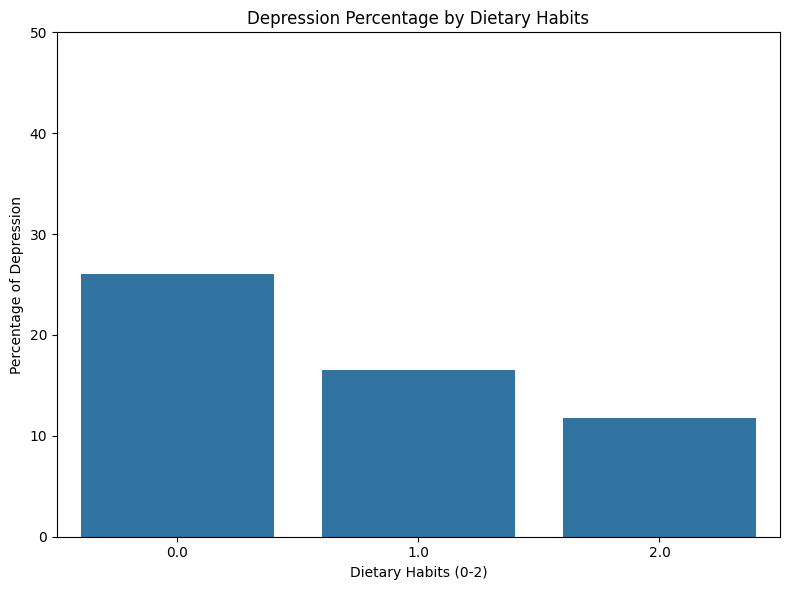

In [9]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=depression_percentage.index, y=depression_percentage.values)

plt.xlabel("Dietary Habits (0-2)")
plt.ylabel("Percentage of Depression")
plt.title("Depression Percentage by Dietary Habits")
plt.xticks(range(3))  # Ensure x-axis ticks are at 0, 1, and 2
plt.ylim(0, 50) # Ensure y-axis is from 0 to 100 for percentage
plt.tight_layout()
plt.savefig('fig/fig_Diet_1.png')
plt.show()

In [10]:
def horas_cat(value):
    if value in ["Less than 5 hours", "3-4 hours", "1-2 hours", "2-3 hours","4-5 hours"]:
        return 4.5
    elif value in ["5-6 hours"]:
        return 5.5
    elif value in ["6-7 hours", "6-8 hours"]:
        return 6.5
    elif value in ["7-8 hours"]:
        return 7.5
    elif value in [ "More than 8 hours"]:
        return 8.5
    elif value in [ "8-9 hours", "9-10 hours", "9-11 hours", "10-11 hours"]:
        return 10
    elif value in [ "50-75 hours", "55-66 hours", "60-65 hours", "20-21 hours", "35-36 hours","40-45 hours",
                   "45-48 hours"]:
        return 12 
    else:
        return np.nan

In [11]:
Mental_Health['Sleep Duration'] = Mental_Health['Sleep Duration'].apply(horas_cat)

In [12]:
Mental_Health['Sleep Duration']=Mental_Health['Sleep Duration'].fillna(6.5)

In [13]:
Mental_Health['Sleep Duration'].value_counts()

Sleep Duration
4.5     38809
7.5     36969
8.5     32726
5.5     32142
6.5        44
10.0        6
12.0        4
Name: count, dtype: int64

In [14]:
dep_sllep_percentage = Mental_Health.groupby('Sleep Duration')['Depression'].mean() * 100

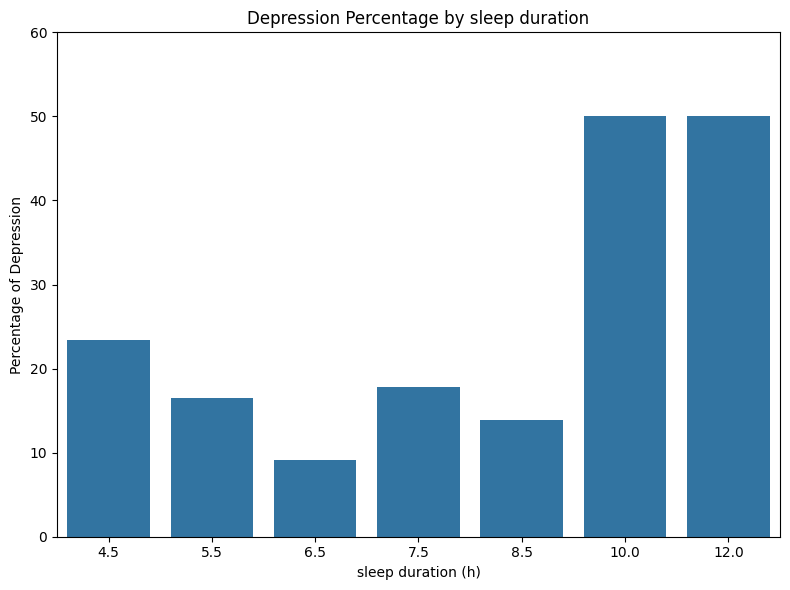

In [19]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=dep_sllep_percentage.index, y=dep_sllep_percentage.values)

plt.xlabel("sleep duration (h)")
plt.ylabel("Percentage of Depression")
plt.title("Depression Percentage by sleep duration")
plt.ylim(0, 60) # Ensure y-axis is from 0 to 100 for percentage
plt.tight_layout()
plt.savefig('fig/fig_sllep_1.png')
plt.show()